## Дипломная работа

Лобов И.В.

### Задание
Дан файл HR.csv с данными по опросу уровня удовлетворенности сотрудниками работой.
Файл доступен тут -https://drive.google.com/file/d/1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1/view?usp=sharingПризнаки:

1. satisfaction_level - Уровень удовлетворенности работой  
2. Last_evaluation - Время с момента последней оценки в годах
3. number_projects- Количество проектов, выполненных за время работы  
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц  
5. time_spend_company - Стаж работы в компании в годах  
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником  
7. left - уволился ли сотрудник  
8. promotion_last_5years - повышался ли сотрудник за последние пять лет  
9. department - отдел в котором работает сотрудник  
10. salary - относительный уровень зарплаты  

#### Требуется выполнить следующее задание:

№	| Задание	| Баллы    |Выполнено
:-------- |:-----:| -------|---------:
1	|Загрузите файл HR.csv в pandas dataframe	|5	|5
2	|Рассчитайте основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).	|10	|10
3	|Рассчитайте и визуализировать корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные.	|10	| 10
4	|Рассчитайте сколько сотрудников работает в каждом департаменте.	|5	|5
5	|Показать распределение сотрудников по зарплатам.	|5	|5
6	|Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности	|5	|5
7	|Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом	|10	|10
8	|Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):  * Доля сотрудников с повышением за последние 5 лет  * Средняя степень удовлетворенности  * Среднее количество проектов|10	|
9	|Разделить данные на тестовую и обучающую выборки. Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary).Оценить качество модели на тестовой выборки.	|20	|
10	|Загрузить jupyter notebook с решение на github и прислать ссылку	|5	|5
    |ИТОГО:|85|55

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Задание №1

In [5]:
hr = pd.read_csv(r'HR.csv')

In [6]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


#### Задание №2

In [7]:
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


#### Задание №3

In [8]:
hr.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


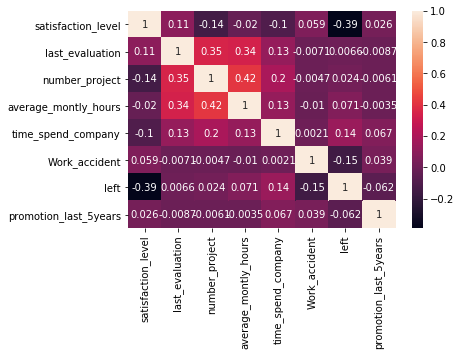

In [9]:
sns.heatmap(hr.corr(),annot=True)

#### Скореллированные переменные
* более 
    * Увольнение(left) и Уровень удовлетворенности(satisfaction_level). Отрицательная связь.
    * Кол-во проектов(number_project) и Кол-во часов на рабочем месте в месяц(average_monthly_hours). Положительная связь

* менее
    * Кол-во инциндентов на работе(Work_accident) и время с последней оценки в годах(last_evaluation).Отрицательная связь.
    * Стаж работы в компании(time_spend_company) и кол-во инциндентов(Work_accident). Положительная связь.

#### Задача 4

In [10]:
#hr[hr.left !=1].groupby(by='department').value_count()
hr[hr.left == 0].pivot_table(index = 'department', columns = 'left', values = 'satisfaction_level', aggfunc = 'count', fill_value = 0)

left,0
department,
IT,954
RandD,666
accounting,563
hr,524
management,539
marketing,655
product_mng,704
sales,3126
support,1674


Text(0, 0.5, 'Кол-во людей')

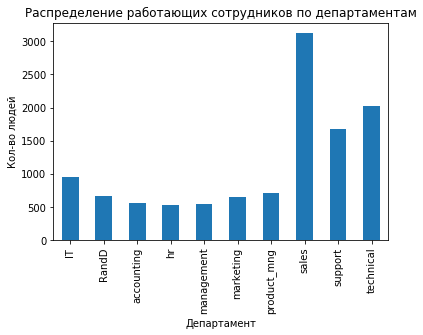

In [11]:
hr[hr.left == 0].pivot_table(index = 'department', values = 'left', aggfunc = 'count', fill_value = 0).plot(kind='bar',legend=False)
plt.title('Распределение работающих сотрудников по департаментам')
plt.xlabel('Департамент')
plt.ylabel('Кол-во людей')

#### Задача 5

In [12]:
hr[hr.left == 0].pivot_table(index = 'salary',  values = 'satisfaction_level', aggfunc = 'count', fill_value = 0)

,satisfaction_level
salary,
high,1155
low,5144
medium,5129


Text(0, 0.5, 'Кол-во людей')

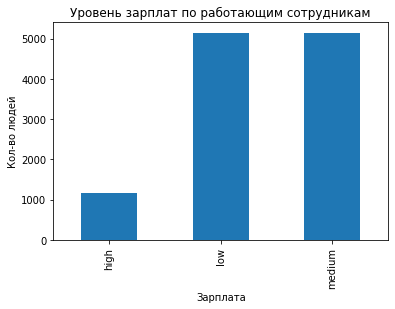

In [13]:
hr[hr.left == 0].pivot_table(index = 'salary',  values = 'satisfaction_level', aggfunc = 'count', fill_value = 0).plot(kind='bar',legend=False)
plt.title('Уровень зарплат по работающим сотрудникам')
plt.xlabel('Зарплата')
plt.ylabel('Кол-во людей')

#### Задача 6

In [19]:
hr[hr.left == 0].pivot_table(index = 'department',columns = 'salary',  values = 'satisfaction_level', aggfunc = 'count', fill_value = 0)

salary,high,low,medium
department,,,
IT,79,437,438
RandD,47,309,310
accounting,69,259,235
hr,39,243,242
management,224,121,194
marketing,71,276,308
product_mng,62,346,296
sales,255,1402,1469
support,133,757,784


Text(0, 0.5, 'Кол-во людей')

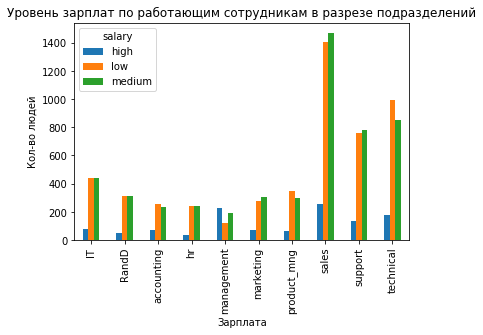

In [21]:
hr[hr.left == 0].pivot_table(index = 'department',columns = 'salary',  values = 'satisfaction_level', aggfunc = 'count', fill_value = 0).plot(kind='bar')
plt.title('Уровень зарплат по работающим сотрудникам в разрезе подразделений')
plt.xlabel('Зарплата')
plt.ylabel('Кол-во людей')

#### Задача 7

In [22]:
hr[hr.left == 0].pivot_table(index = 'salary',  values = 'average_montly_hours', aggfunc = ('mean','sum','count'), fill_value = 0)

,count,mean,sum
salary,,,
high,1155,200.348052,231402
low,5144,198.617418,1021688
medium,5129,199.214272,1021770


Сотрудник с более высокой зарплатой в среднем в месяц проводит больше времени на 1,7 часа больше. Если проводить оценку по работающим сотрудникам.

Text(0, 0.5, 'Время на работе в среднем')

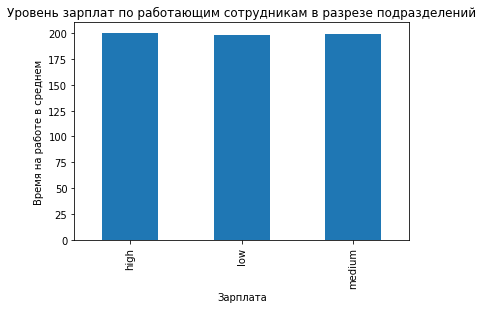

In [73]:
hr[hr.left == 0].pivot_table(index = 'salary',  values = 'average_montly_hours', aggfunc = 'mean', fill_value = 0).plot(kind='bar',legend=False)
plt.title('Уровень зарплат по работающим сотрудникам в разрезе подразделений')
plt.xlabel('Зарплата')
plt.ylabel('Время на работе в среднем')

In [74]:
hr.pivot_table(index = 'salary',  values = 'average_montly_hours', aggfunc = ('mean','sum','count'), fill_value = 0)

,count,mean,sum
salary,,,
high,1237,199.867421,247236
low,7316,200.996583,1470491
medium,6446,201.338349,1297827


In [75]:
hr[hr.left == 1].pivot_table(index = 'salary',  values = 'average_montly_hours', aggfunc = ('mean','sum','count'), fill_value = 0)

,count,mean,sum
salary,,,
high,82,193.097561,15834
low,2172,206.631215,448803
medium,1317,209.610478,276057


#### Задача 8

Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):  
* Доля сотрудников с повышением за последние 5 лет
* Средняя степень удовлетворенности
* Среднее количество проектов

In [37]:
t1 = hr[hr.promotion_last_5years == 1].pivot_table(index = 'left',  values = 'average_montly_hours', aggfunc = ('count'), fill_value = 0).reset_index()
t2 = hr.pivot_table(index = 'left',  values = 'average_montly_hours', aggfunc = ('count'), fill_value = 0).reset_index()
ta = t1.merge(t2,on='left',how='left')

In [54]:
print(f'Среди работающих сотрудников {ta.loc[0][1]}, повышалось {ta.loc[0][2]} сотрудников. Что составило {round((ta.loc[0][1]/ta.loc[0][2])*100,2)}%')
print(f'Среди уволившихся сотрудников {ta.loc[1][1]}, повышалось {ta.loc[1][2]} сотрудников. Что составило {round((ta.loc[1][1]/ta.loc[1][2])*100,2)}%')

Среди работающих сотрудников 300, повышалось 11428 сотрудников. Что составило 2.63%
Среди уволившихся сотрудников 19, повышалось 3571 сотрудников. Что составило 0.53%


,left,average_montly_hours_x,average_montly_hours_y
0,0,300,11428
1,1,19,3571


In [66]:
av_sl = hr[hr.promotion_last_5years == 1].pivot_table(index = 'left',  values = 'satisfaction_level', aggfunc = ('mean'), fill_value = 0).reset_index()
print (f'Средняя степень удовлетворенности работающих сотрудников:{round(av_sl.loc[0][1]*100,2)}% \nСредняя степень удовлетворенности уволившихся сотрудников:{round(av_sl.loc[1][1]*100,2)}%')

Средняя степень удовлетворенности работающих сотрудников:66.84% 
Средняя степень удовлетворенности уволившихся сотрудников:46.0%


In [69]:
av_pj = hr[hr.promotion_last_5years == 1].pivot_table(index = 'left',  values = 'number_project', aggfunc = ('mean'), fill_value = 0).reset_index()
print (f'Среднее кол-во проектов работающих сотрудников:{round(av_pj.loc[0][1],2)} \nСреднее кол-во проектов уволившихся сотрудников:{round(av_pj.loc[1][1],2)}')

Среднее кол-во проектов работающих сотрудников:3.8 
Среднее кол-во проектов уволившихся сотрудников:3.05


Меньшее кол-во повышений приводилок к потере удовлетворенности работой.  
Как следствие снижало эффективность - то есть кол-во проектов перед увольнением.  
При этом снижение удовлетворенности имеет высокую кореляцию с последующим увольнением.

#### Задача 9

Разделить данные на тестовую и обучающую выборки.  
Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary).  
Оценить качество модели на тестовой выборки.

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [136]:
X = hr[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years']]
y = hr['left']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [137]:
print(X_train.shape,y_train.shape)

(10499, 7) (10499,)


In [138]:
model = LDA()
model.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

Получаем коэфиценты модели

In [149]:
model.coef_

array([[-4.57738626e+00,  6.13822647e-01, -2.10613368e-01,
         4.55442333e-03,  2.21314862e-01, -1.05033789e+00,
        -1.08559074e+00]])

In [140]:
model.predict(X_test).T

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [141]:
result = pd.DataFrame([y_test, model.predict(X_test)]).T

In [142]:
result

,left,Unnamed 0
6723,0.0,NaN
6473,0.0,NaN
4679,0.0,NaN
862,1.0,1.0
7286,0.0,NaN
...,...,...
13388,0.0,NaN
10463,0.0,NaN
5331,0.0,NaN
7499,0.0,NaN


In [143]:
from sklearn.metrics import accuracy_score

In [144]:
accuracy_score(y_test, model.predict(X_test))

0.7557777777777778

Качество модели на тестовой выборки 75,58%.  
Если мы оставим показатели которые наиболее корелируют  
с прогнозируемым параметром качество модели вырастит на +0,62%  

In [145]:
X = hr[['satisfaction_level','Work_accident','promotion_last_5years']]
y = hr['left']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
model2 = LDA()
model2.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

Оставив в моделе максильно влияющиие параметры мы улучшаем её показатели.  
Параметры также кроме весов коэфицентов подверждены по кореляционной матрице(heat-map)из задачи 3.  

In [146]:
model2.coef_

array([[-4.42695002, -1.0226697 , -0.91345899]])

In [147]:
accuracy_score(y_test, model2.predict(X_test))

0.762

#### Задача 10
Ноутбук за "pushин" на GitHub...